## Observations and Insights 

In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [237]:
# Checking the number of mice.
len(merge_data_df["Mouse ID"].unique())

249

In [242]:
# Getting the duplicate mouse by ID number that shows up for Mouse ID and Timepoint 
duplicate = merge_data_df.loc[merge_data_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [243]:
#Optional - gather all data for duplicate mouse
all_duplicate_df = merge_data_df.loc[merge_data_df["Mouse ID"] == "g989"]
all_duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [244]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_data_df[merge_data_df['Mouse ID'].isin(duplicate)==False] 

In [245]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [246]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group by drug regimen
grouped_regimen_df = cleaned_df.groupby(["Drug Regimen"])

# Calculate summary statistics
mean_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].mean()
median_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].median()
variance_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].var()
stdev_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].std()
SEM_volume_df = grouped_regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe
summary_df = pd.DataFrame({"Mean": mean_volume_df, 
                          "Median": median_volume_df, 
                          "Variance": variance_volume_df, 
                          "Standard Deviation": stdev_volume_df, 
                          "SEM": SEM_volume_df})

# Print summary statistics dataframe
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [247]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df = grouped_regimen_df["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
renamed_summary_statistics_df = summary_statistics_df.rename(columns={'mean': 'Mean', 'median': 'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})
renamed_summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

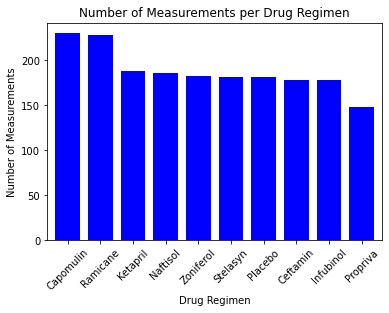

In [253]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Determine count per drug regimen
drug_regimen = cleaned_df["Drug Regimen"].value_counts()

# Generate and display bar plot using pandas
drug_regimen.plot(kind = 'bar', color = 'b', width = .75, rot = 45)

# Add title and axis labels 
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

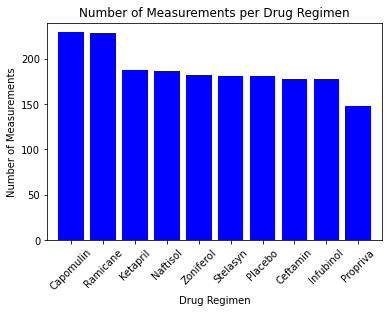

In [252]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Generate bar plot using pyplot
plt.bar(drug_regimen.index.values, drug_regimen,  color= 'b', align="center")

# Add title and axis labels 
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

# Format plot 
plt.xlim(-0.75, len(drug_regimen)-0.25)
plt.ylim(0,max(drug_regimen)+10)
plt.xticks(rotation=45)

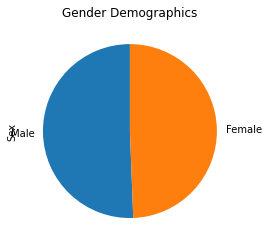

In [280]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Calculate gender count
gender_count = merge_data_df.Sex.value_counts()

# Generate pie plot using pandas
gender_count.plot(kind='pie', y = gender_count, title="Gender Demographics", startangle=90)

plt.show()

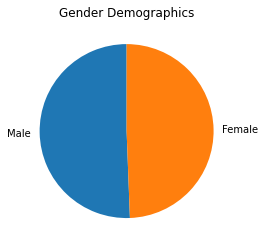

In [279]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Generate pie plot using pyplot
plt.pie(gender_count, labels = gender_count.index, startangle = 90)
plt.title("Gender Demographics")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

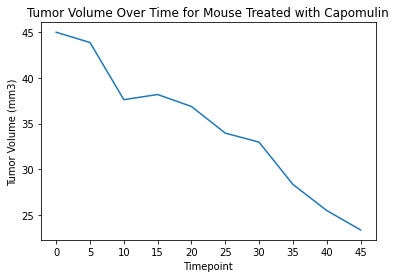

In [305]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create dataframe with drug regimen, mouse id, timepoint, and tumor volume columns
reduced_df = cleaned_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Groupby drug regimen 
drug_regimen_reduced_df = reduced_df.groupby(["Drug Regimen"])

# Select only those within the Capomulin regimen
capomulin_df = drug_regimen_reduced_df.get_group("Capomulin")

# Select one mouse in the Capomulin regimen and create dataframe
s185_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "s185"]

# Generate and format line plot 
plt.plot((s185_df["Timepoint"]), s185_df["Tumor Volume (mm3)"])
plt.xticks(np.arange(0,50,step=5))
plt.title("Tumor Volume Over Time for Mouse Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()                                             

In [319]:
capomulin_df_2.head()

,Drug Regimen,Mouse ID,Weight (g),Timepoint,Tumor Volume (mm3)
10,Capomulin,s185,17,0,45.000000
11,Capomulin,s185,17,5,43.878496
12,Capomulin,s185,17,10,37.614948
13,Capomulin,s185,17,15,38.177232
14,Capomulin,s185,17,20,36.866876


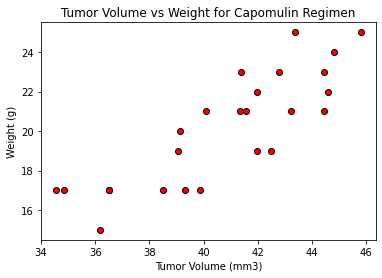

In [333]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe with drug regimen, mouse id, weight, timepoint, and tumor volume columns
reduced_df_2 = cleaned_df[["Drug Regimen", "Mouse ID", "Weight (g)", "Timepoint", "Tumor Volume (mm3)"]]

# Groupby drug regimen
drug_regimen_reduced_df_2= reduced_df_2.groupby(["Drug Regimen"])

# Select only those within the Capomulin regimen
capomulin_df_2 = drug_regimen_reduced_df_2.get_group("Capomulin")

# Groupby mouse ID
capomulin_df_2_grouped_id = capomulin_df_2.groupby(["Mouse ID"])

# Determine averages of tumor volume and weight per mouse
avg_tumor_volume_df = capomulin_df_2_grouped_id["Tumor Volume (mm3)"].mean()
avg_weight_df = capomulin_df_2_grouped_id["Weight (g)"].mean()

# Create summary dataframe for averages
avg_summary_df = pd.DataFrame({"Avg Tumor Volume": avg_tumor_volume_df, 
                              "Average Weight": avg_weight_df})

# Generate and format scatter plot 
#plt.scatter(capomulin_df_2["Tumor Volume (mm3)"], capomulin_df_2["Weight (g)"], marker="o", facecolors="red", edgecolors="black")
plt.scatter(avg_summary_df["Avg Tumor Volume"], avg_summary_df["Average Weight"], marker="o", facecolors="red", edgecolors="black")
plt.title("Tumor Volume vs Weight for Capomulin Regimen")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

plt.show()

## Correlation and Regression

In [335]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_summary_df["Avg Tumor Volume"], avg_summary_df["Average Weight"])
print(f"The correlation between tumor volume and weight is {round(correlation[0],2)}")

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,50),fontsize=15,color="red")

The correlation between tumor volume and weight is 0.84
